In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [13]:
df = pd.read_csv('Florida_ct.csv')

In [14]:
# Load the shapefile
florida_shapefile = gpd.read_file('tl_2020_12_tract/tl_2020_12_tract.shp')

In [15]:
# Ensure the data type matches for merging
florida_shapefile['GEOID'] = florida_shapefile['GEOID'].astype('int64')
df['full_ct_fips'] = df['full_ct_fips'].astype('int64')

In [16]:
# Adjust the feature names based on your dataset
X = df[['travel_driving_ratio']].values 

In [17]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Initialize DBSCAN with specified epsilon and min_samples parameters
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.25, min_samples=200)
# Fit the model to the scaled data
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [46]:
# Merge the DBSCAN clustering results into the GeoDataFrame for plotting
df_shp_dbscan = florida_shapefile.merge(df[['full_ct_fips', 'dbscan_cluster']],
                                        how='left',
                                        left_on='GEOID',
                                        right_on='full_ct_fips')

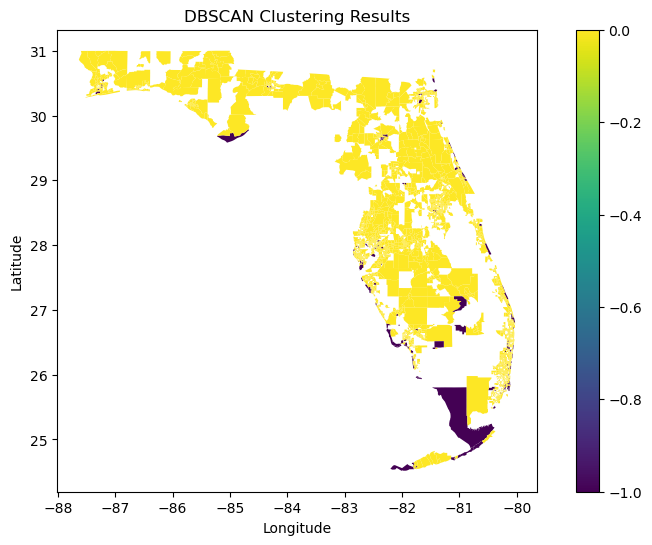

In [47]:
# Plot the map with DBSCAN clustering results
fig, ax = plt.subplots(figsize=(10, 6))
df_shp_dbscan.plot(ax=ax, column='dbscan_cluster', cmap='viridis', legend=True, edgecolor='none')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()